In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
X = df.iloc[:][:]
y = iris["target"]
dict_svm = {}
dict_mlp = {}
dict_rfr = {}
print(X, y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [67]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  from sklearn.metrics import accuracy_score
  import seaborn as sns
  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  class_names = ['Setosa', 'Versicolor', 'Virginica']
  plt.figure(figsize=(8, 6))
  sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix for Iris Dataset')
  plt.show()


  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### **SVM CLASSIFIER**

In [68]:
def SVMClassifier(split, kernalValue = 'rbf', degreeValue = 3, gammaValue = 'scale', maxIter = -1):
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split, random_state=44)
  classifier = SVC(kernel = kernalValue, degree = degreeValue, gamma = gammaValue, max_iter = maxIter)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_svm):
    dict_svm[str(split)] = max(accuracy, dict_svm[str(split)])
  else:
    dict_svm[str(split)] = accuracy

  reports(y_test, y_pred)


Confusion Matrix : 


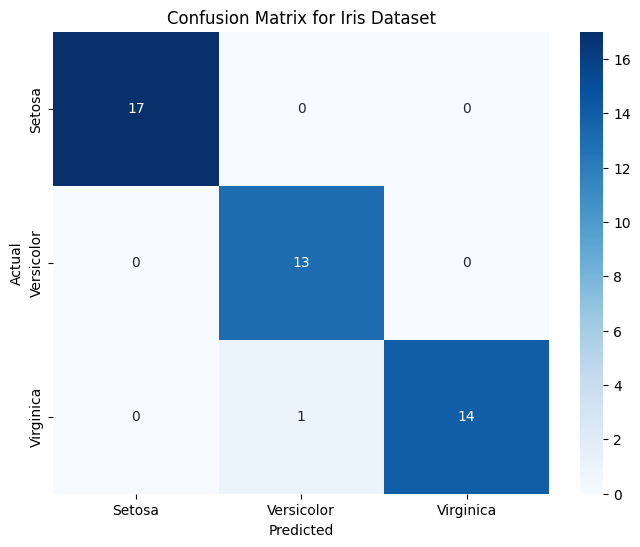

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix : 


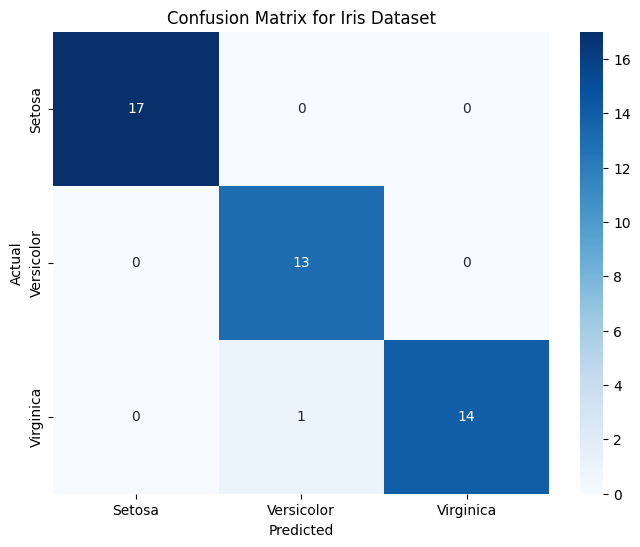

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix : 


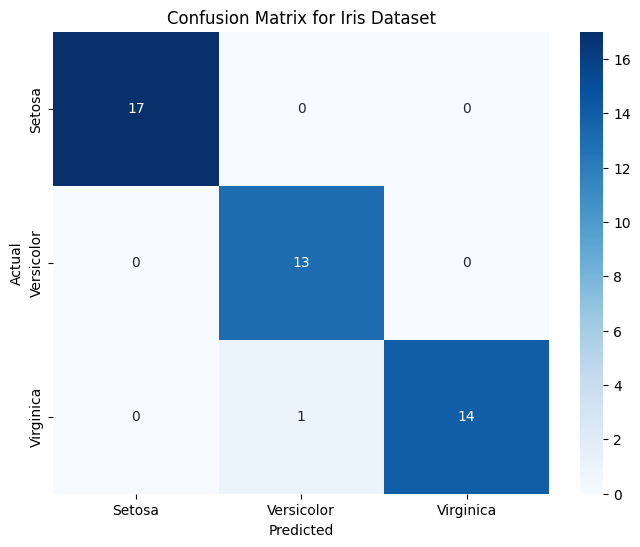

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix : 


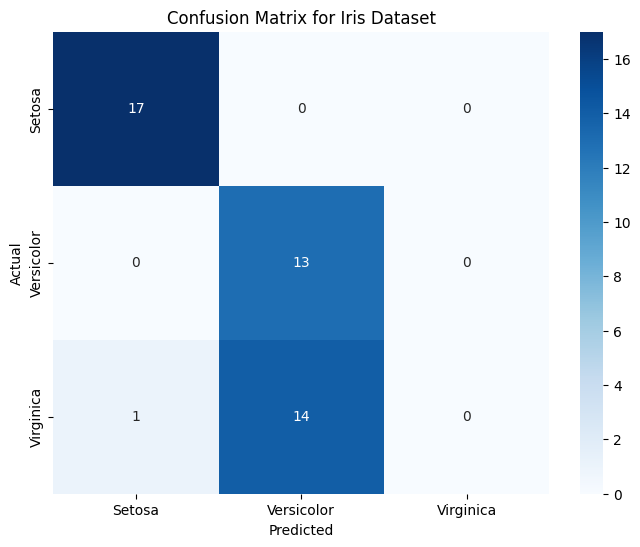

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.48      1.00      0.65        13
           2       0.00      0.00      0.00        15

    accuracy                           0.67        45
   macro avg       0.48      0.67      0.54        45
weighted avg       0.50      0.67      0.55        45



In [69]:
#Train - Test split 70-30
SVMClassifier(0.3)
SVMClassifier(0.3, 'linear')
SVMClassifier(0.3, 'poly')
SVMClassifier(0.3, 'sigmoid', 3, 0.022)

Confusion Matrix : 


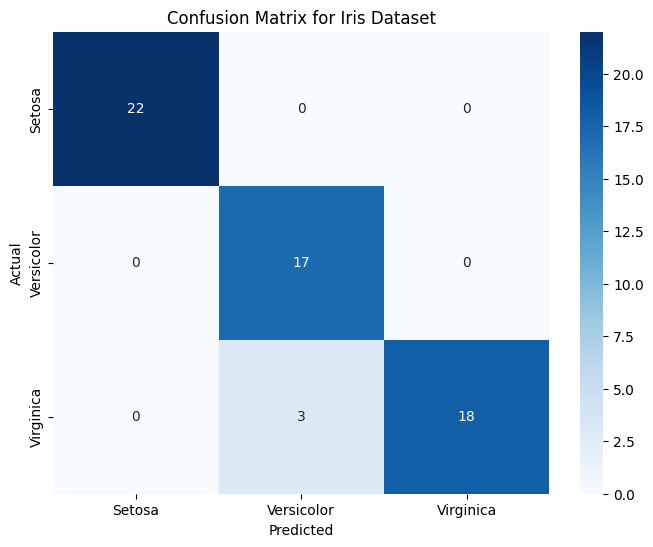

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.85      1.00      0.92        17
           2       1.00      0.86      0.92        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

Confusion Matrix : 


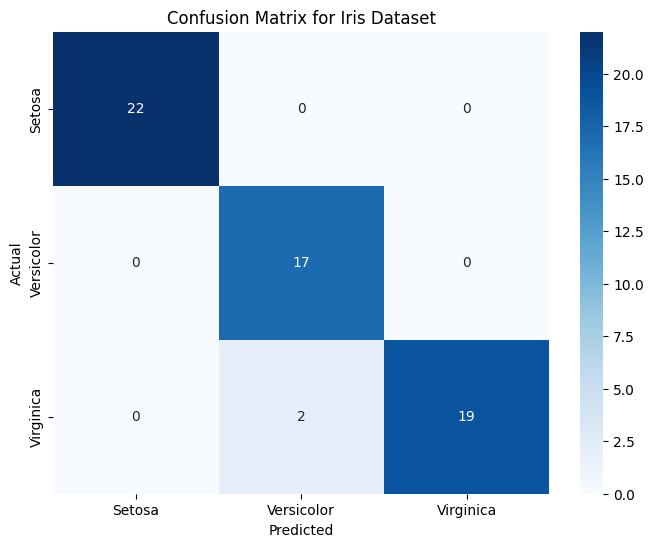

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.89      1.00      0.94        17
           2       1.00      0.90      0.95        21

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60

Confusion Matrix : 


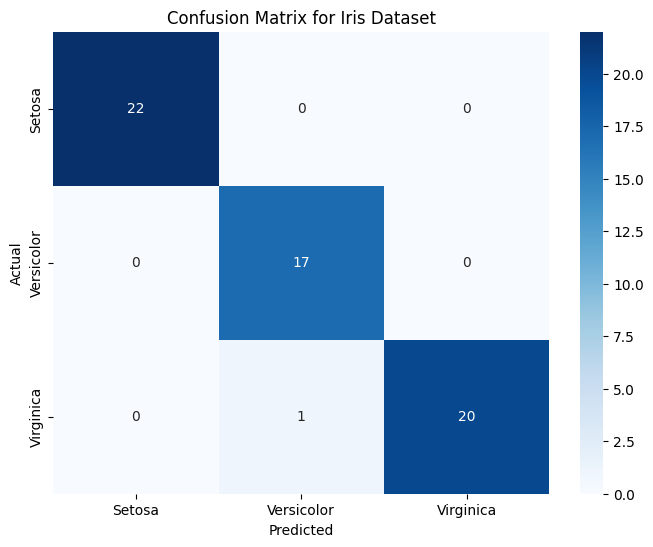

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.94      1.00      0.97        17
           2       1.00      0.95      0.98        21

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix : 


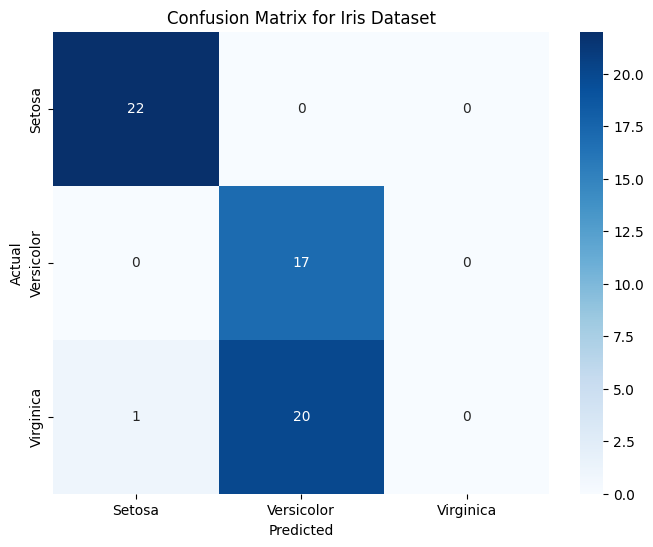

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.46      1.00      0.63        17
           2       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.47      0.67      0.54        60
weighted avg       0.48      0.65      0.54        60



In [70]:
#Train - Test split 60-40
SVMClassifier(0.4, 'rbf', 3, 'auto')
SVMClassifier(0.4, 'linear')
SVMClassifier(0.4, 'poly')
SVMClassifier(0.4, 'sigmoid', 3, 0.023 ) #wrost performance

Confusion Matrix : 


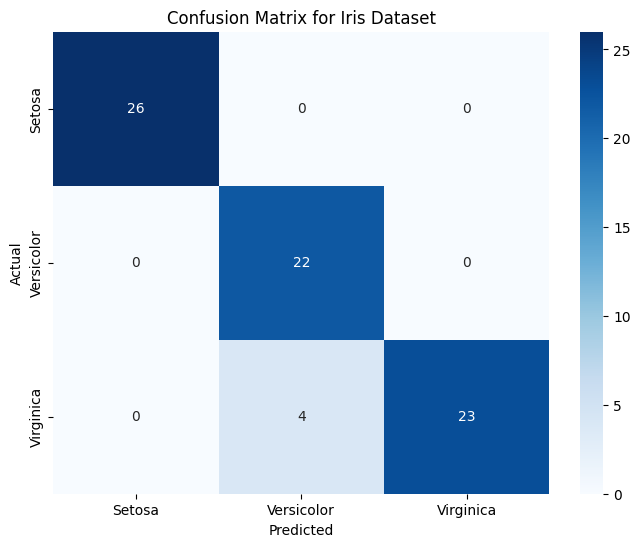

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.85      1.00      0.92        22
           2       1.00      0.85      0.92        27

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Confusion Matrix : 


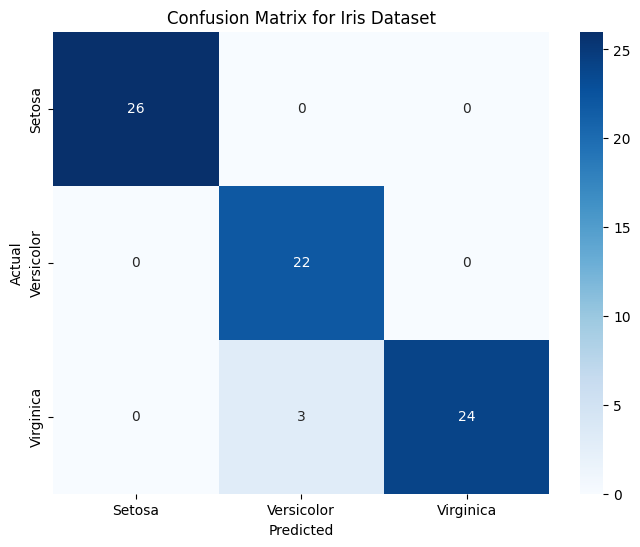

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.88      1.00      0.94        22
           2       1.00      0.89      0.94        27

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

Confusion Matrix : 


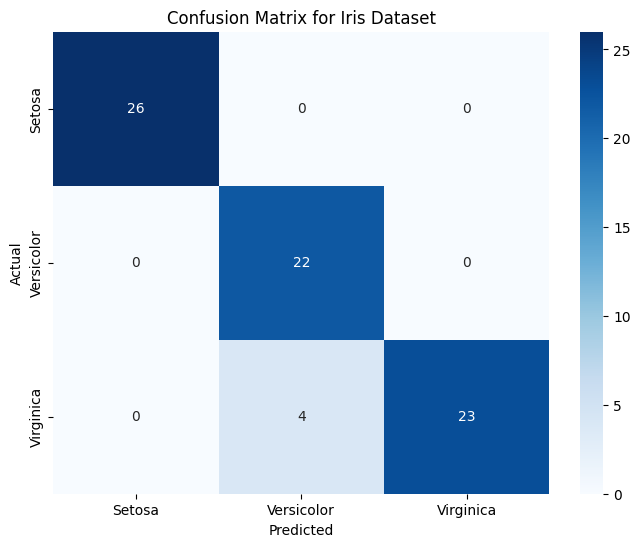

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.85      1.00      0.92        22
           2       1.00      0.85      0.92        27

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

Confusion Matrix : 


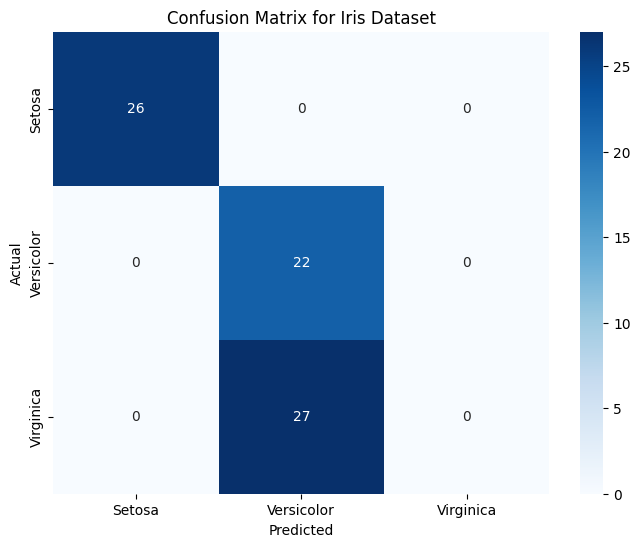

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.45      1.00      0.62        22
           2       0.00      0.00      0.00        27

    accuracy                           0.64        75
   macro avg       0.48      0.67      0.54        75
weighted avg       0.48      0.64      0.53        75



In [71]:
#Train - Test split 50-50
SVMClassifier(0.5, 'rbf', 3, 'auto')
SVMClassifier(0.5, 'linear')
SVMClassifier(0.5, 'poly')
SVMClassifier(0.5, 'sigmoid', 3, 0.022) #wrost performance

Confusion Matrix : 


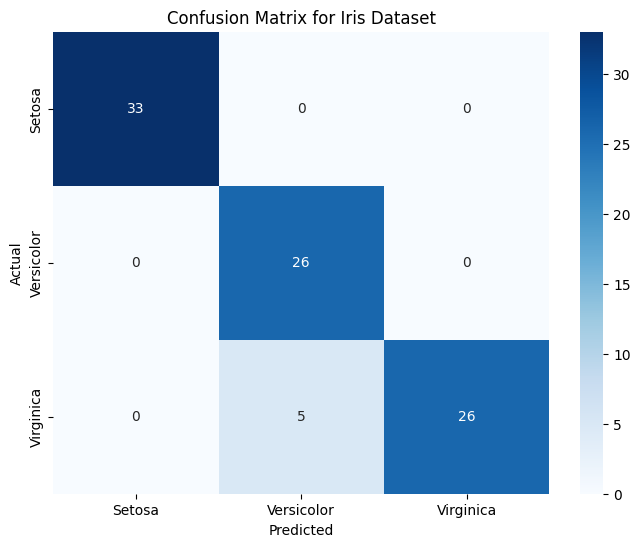

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.84      1.00      0.91        26
           2       1.00      0.84      0.91        31

    accuracy                           0.94        90
   macro avg       0.95      0.95      0.94        90
weighted avg       0.95      0.94      0.94        90

Confusion Matrix : 


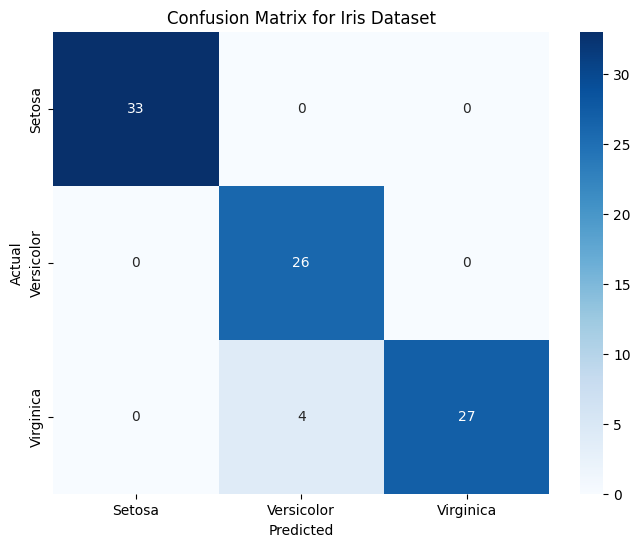

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.87      1.00      0.93        26
           2       1.00      0.87      0.93        31

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion Matrix : 


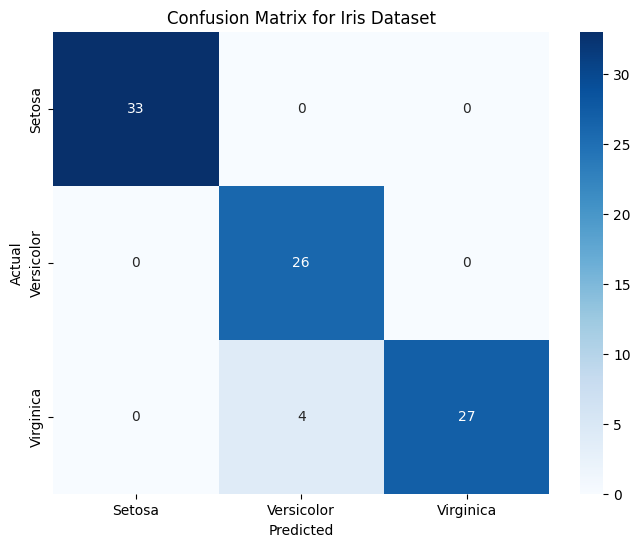

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.87      1.00      0.93        26
           2       1.00      0.87      0.93        31

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion Matrix : 


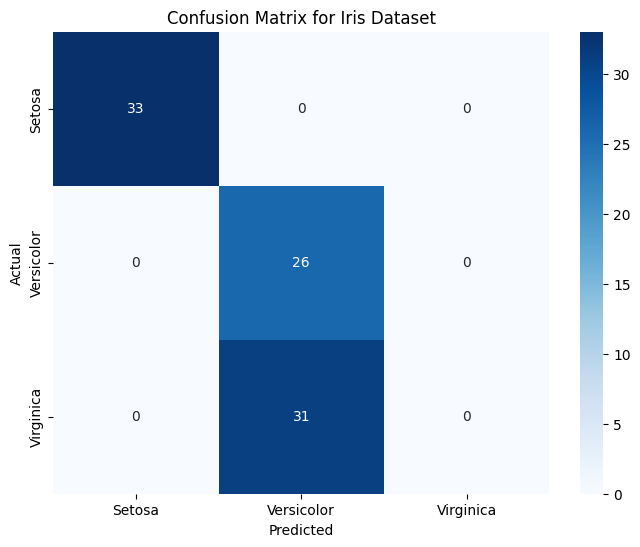

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.46      1.00      0.63        26
           2       0.00      0.00      0.00        31

    accuracy                           0.66        90
   macro avg       0.49      0.67      0.54        90
weighted avg       0.50      0.66      0.55        90



In [72]:
#Train - Test split 40-60
SVMClassifier(0.6, 'rbf', 3, 'auto')
SVMClassifier(0.6, 'linear')
SVMClassifier(0.6, 'poly')
SVMClassifier(0.6, 'sigmoid', 3, 0.015 ) #wrost performance

Confusion Matrix : 


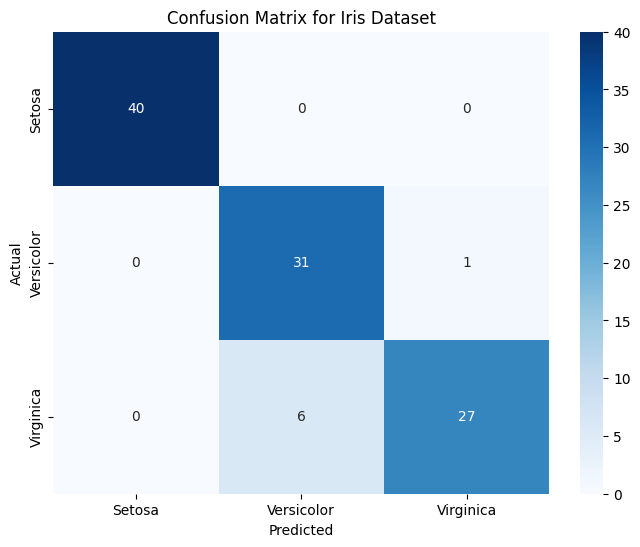

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.84      0.97      0.90        32
           2       0.96      0.82      0.89        33

    accuracy                           0.93       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.94      0.93      0.93       105

Confusion Matrix : 


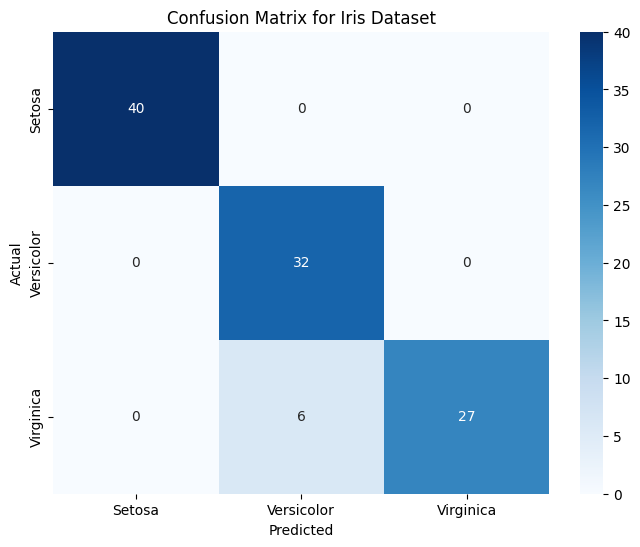

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.84      1.00      0.91        32
           2       1.00      0.82      0.90        33

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105

Confusion Matrix : 


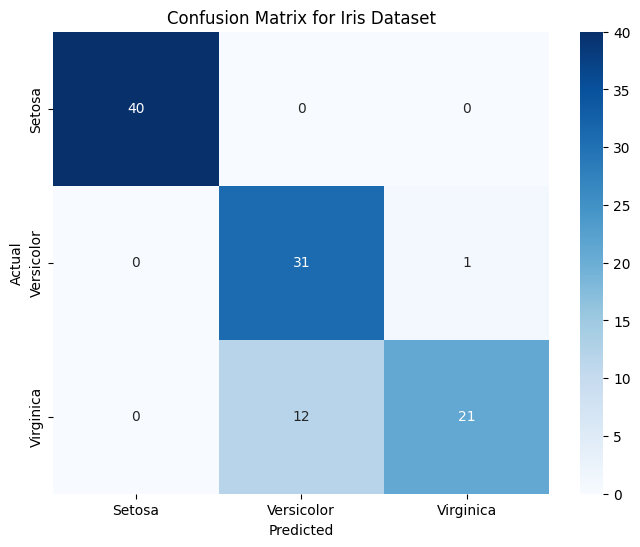

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.72      0.97      0.83        32
           2       0.95      0.64      0.76        33

    accuracy                           0.88       105
   macro avg       0.89      0.87      0.86       105
weighted avg       0.90      0.88      0.87       105

Confusion Matrix : 


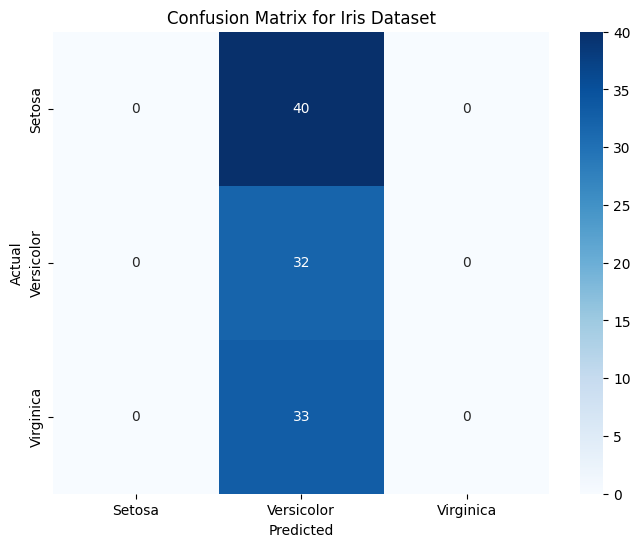

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.30      1.00      0.47        32
           2       0.00      0.00      0.00        33

    accuracy                           0.30       105
   macro avg       0.10      0.33      0.16       105
weighted avg       0.09      0.30      0.14       105



In [73]:
#Train - Test split 30-70
SVMClassifier(0.7, 'rbf', 3, 'auto')
SVMClassifier(0.7, 'linear')
SVMClassifier(0.7, 'poly')
SVMClassifier(0.7, 'sigmoid', 3, 2 ) #wrost performance

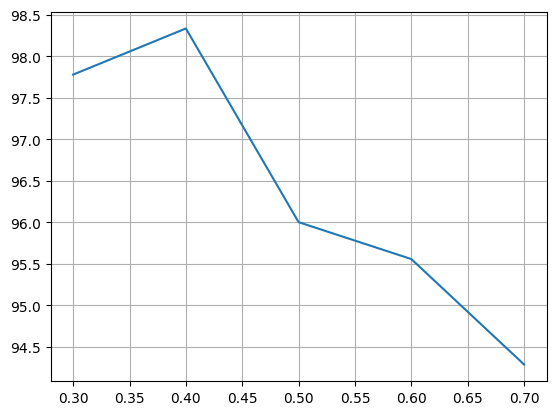

In [74]:
x_points = [float(key) for key in dict_svm]
y_points = [i*100 for i in dict_svm.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **MLP Classifier**

In [75]:
def MLPClassifier(split, hiddenLayerSize = [100, ], activationValue = 'relu', solverValue = 'adam'):
  from sklearn.model_selection import train_test_split
  from sklearn.neural_network import MLPClassifier
  from sklearn.metrics import accuracy_score
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = MLPClassifier(hidden_layer_sizes = hiddenLayerSize, activation = activationValue, solver = solverValue, random_state = 1)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_mlp):
    dict_mlp[str(split)] = max(accuracy, dict_mlp[str(split)])
  else:
    dict_mlp[str(split)] = accuracy
  reports(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix : 


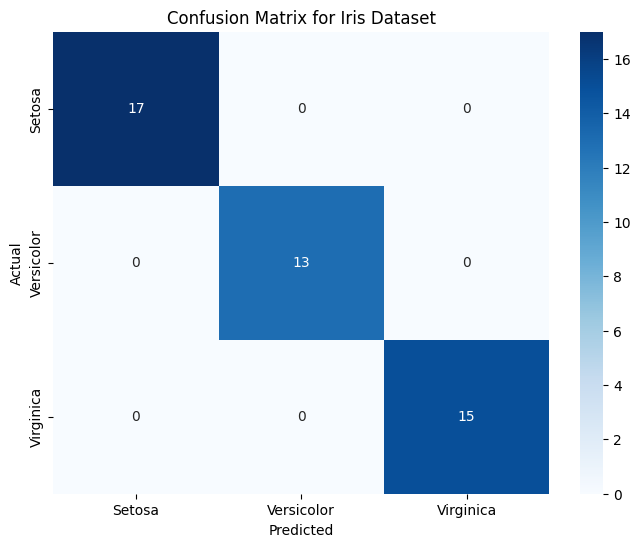

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [76]:
#Train - Test split 70-30
MLPClassifier(0.3, [30, ])

Confusion Matrix : 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


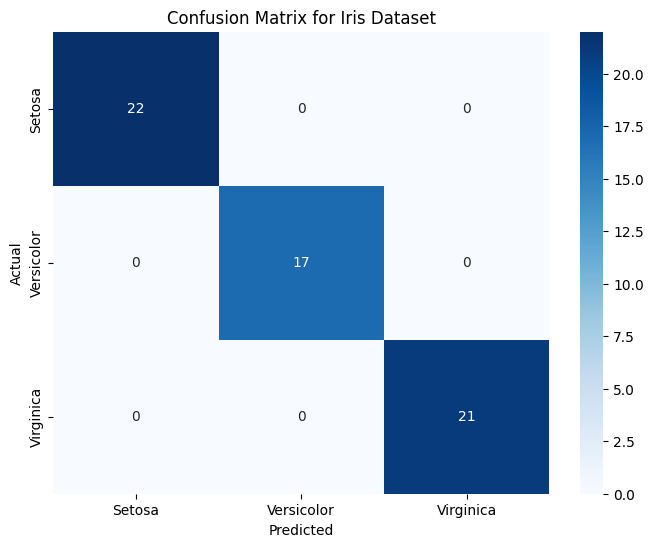

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        21

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [77]:
#Train - Test split 60-40
MLPClassifier(0.4, [35, ])

Confusion Matrix : 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


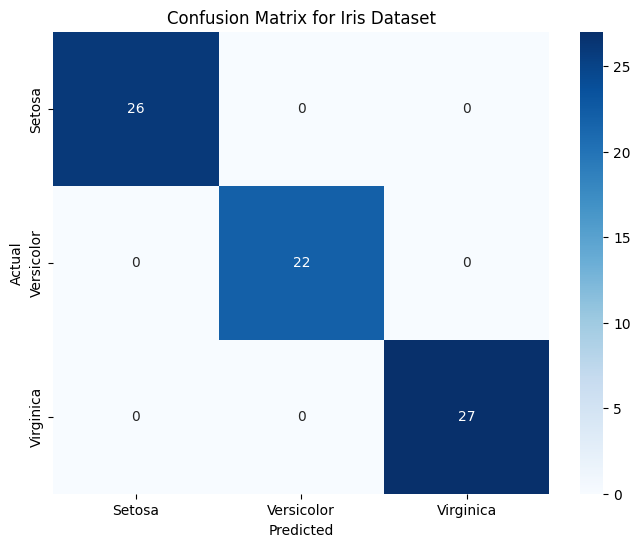

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        27

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [78]:
#Train - Test split 50-50
MLPClassifier(0.5, [35, ])

Confusion Matrix : 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


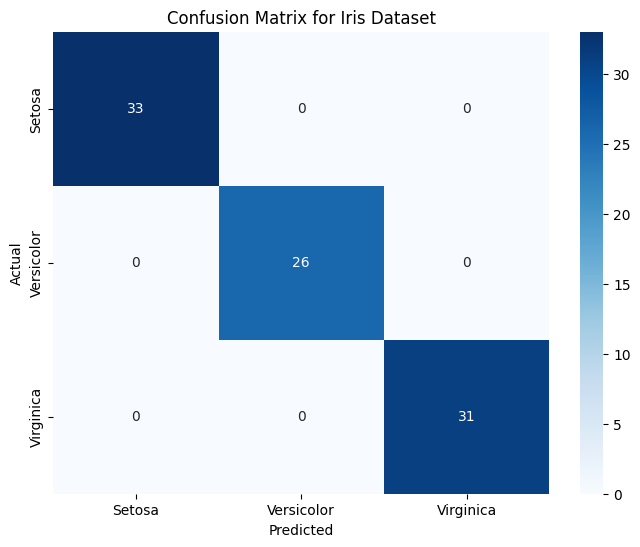

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        31

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [79]:
#Train - Test split 40-60
MLPClassifier(0.6, [45, 8])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion Matrix : 


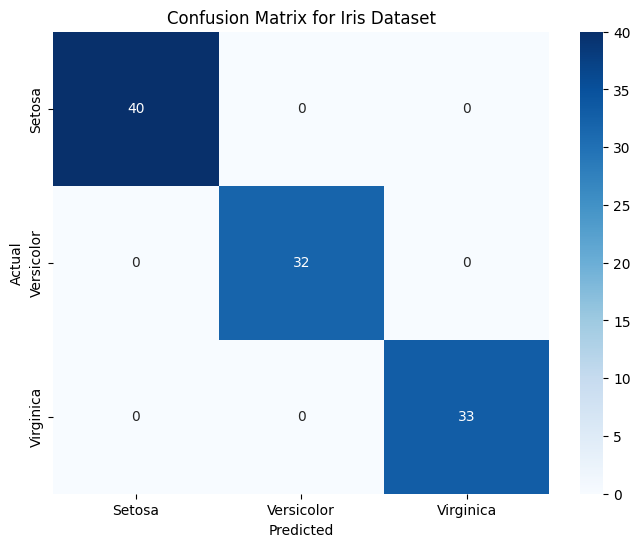

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        33

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [80]:
#Train - Test split 30-70
MLPClassifier(0.7, [50, 10])

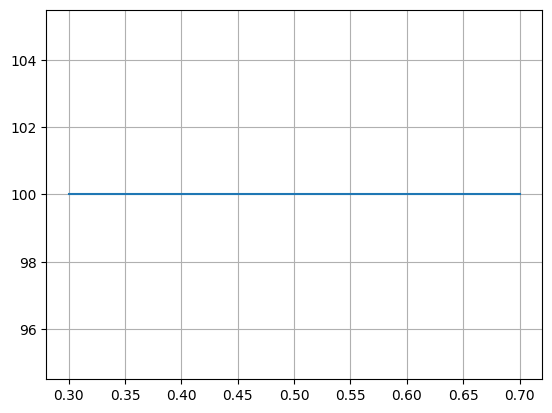

In [81]:
x_points = [float(key) for key in dict_mlp]
y_points = [i*100 for i in dict_mlp.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Random Forest Classifier**

In [82]:
def randomForest(split, estimator = 100, criterionValue = 'gini', ):
  from sklearn.model_selection import train_test_split
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(X)
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = split, random_state=44)
  classifier = RandomForestClassifier(n_estimators = estimator, criterion = criterionValue)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  if(str(split) in dict_rfr):
    dict_rfr[str(split)] = max(accuracy, dict_rfr[str(split)])
  else:
    dict_rfr[str(split)] = accuracy

  reports(y_test, y_pred)


Confusion Matrix : 


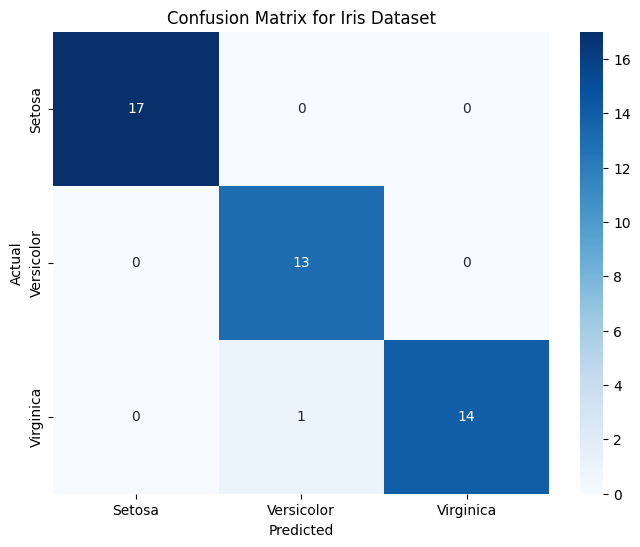

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [83]:
randomForest(0.3)

Confusion Matrix : 


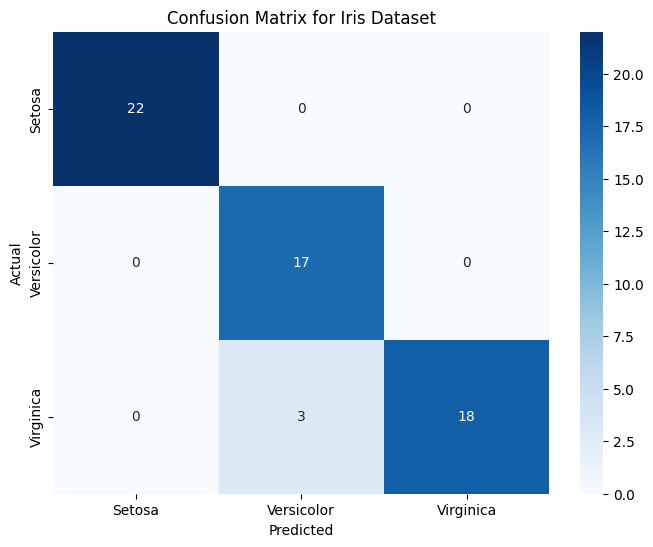

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.85      1.00      0.92        17
           2       1.00      0.86      0.92        21

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



In [84]:
randomForest(0.4)

Confusion Matrix : 


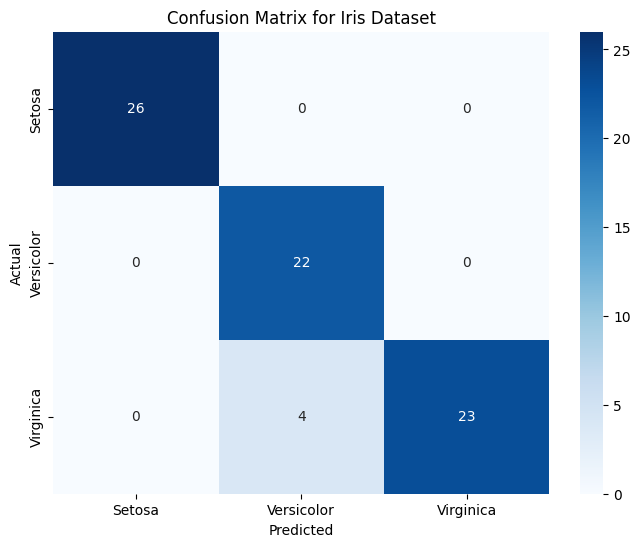

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.85      1.00      0.92        22
           2       1.00      0.85      0.92        27

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [85]:
randomForest(0.5)

Confusion Matrix : 


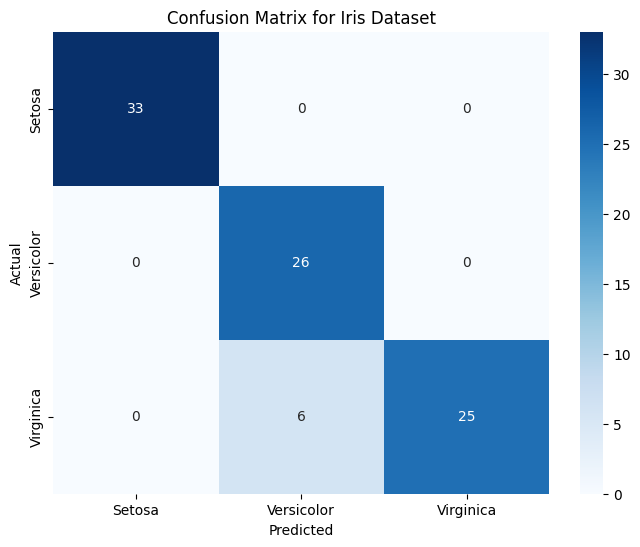

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.81      1.00      0.90        26
           2       1.00      0.81      0.89        31

    accuracy                           0.93        90
   macro avg       0.94      0.94      0.93        90
weighted avg       0.95      0.93      0.93        90



In [86]:
randomForest(0.6, 100, 'entropy')

Confusion Matrix : 


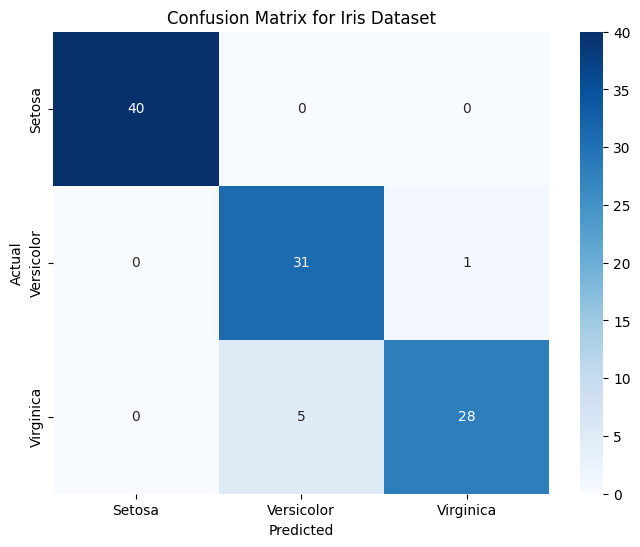

**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.86      0.97      0.91        32
           2       0.97      0.85      0.90        33

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



In [87]:
randomForest(0.7, 120)

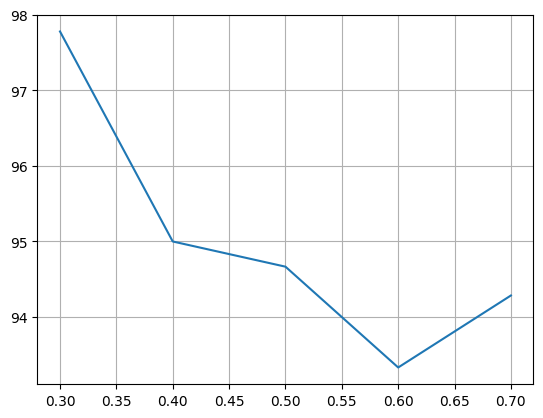

In [88]:
x_points = [float(key) for key in dict_rfr]
y_points = [i*100 for i in dict_rfr.values()]
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()